<a href="https://colab.research.google.com/github/Guliko24/CF969_SU/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are asked to formulate Markowitz model for portfolio optimisation as a quadratic optimization
problem, and solve it using Python, for example using Gurobipy or any other appropriate solver such
as qpsolvers1.



# **Let's try doing it with Guroby**



In [7]:
pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 48.7 MB/s eta 0:00:00


In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from gurobipy import Model, QuadExpr, GRB

def markowitz_optimization(C, mu, r):
    """
    Solve the Markowitz portfolio optimization problem.

    Parameters:
    C (numpy.ndarray): Covariance matrix of asset returns.
    mu (numpy.ndarray): Expected returns of the assets.
    r (float): Target return for the portfolio.

    Returns:
    dict: A dictionary containing optimal weights, expected return, and portfolio variance.
    """
    n = len(mu)
    model = Model()
    x = model.addVars(n, lb=0, name="x")

    obj = QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += 0.5 * C[i, j] * x[i] * x[j]

    model.setObjective(obj, GRB.MINIMIZE)
    model.addConstr(sum(mu[i] * x[i] for i in range(n)) == r, "return")
    model.addConstr(sum(x[i] for i in range(n)) == 1, "investment")
    model.optimize()

    optimal_weights = np.array([x[i].X for i in range(n)])
    expected_return = np.dot(optimal_weights, mu)
    portfolio_variance = np.dot(optimal_weights.T, np.dot(C, optimal_weights))

    return {
        "optimal_weights": optimal_weights,
        "expected_return": expected_return,
        "portfolio_variance": portfolio_variance
    }

# Generate the data
n = 10
dig1 = 1  # Replace with the second-to-last digit of your registration number
dig2 = 7  # Replace with the last digit of your registration number
dummyrepetitions = 10 * dig1 + dig2

for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

ssigma = np.array([0.0] * n, dtype=float)
mmu = np.array([0.0] * n, dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

ddiag = np.diag(ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Solve for different values of r
target_returns = np.arange(2.0, 9.25, 0.25)
sigma_values = []
mu_values = []

for r in target_returns:
    result = markowitz_optimization(C, mmu, r)
    sigma_values.append(np.sqrt(result["portfolio_variance"]))
    mu_values.append(result["expected_return"])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o')
plt.xlabel('Portfolio Risk (σ)')
plt.ylabel('Expected Return (μ)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x270f812f
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.01s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.48206828e+07 -1

AttributeError: Unable to retrieve attribute 'X'

The error you're encountering occurs because the optimization model did not solve successfully, hence it cannot retrieve the attribute X from the decision variables. This often happens if the model is infeasible or unbounded for certain target returns.

To address this issue, we need to add error handling to check the optimization status before trying to access the results. Here's the updated code with error handling included:

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from gurobipy import Model, QuadExpr, GRB

def markowitz_optimization(C, mu, r):
    """
    Solve the Markowitz portfolio optimization problem.

    Parameters:
    C (numpy.ndarray): Covariance matrix of asset returns.
    mu (numpy.ndarray): Expected returns of the assets.
    r (float): Target return for the portfolio.

    Returns:
    dict: A dictionary containing optimal weights, expected return, and portfolio variance.
    """
    n = len(mu)
    model = Model()
    x = model.addVars(n, lb=0, name="x")

    obj = QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += 0.5 * C[i, j] * x[i] * x[j]

    model.setObjective(obj, GRB.MINIMIZE)
    model.addConstr(sum(mu[i] * x[i] for i in range(n)) == r, "return")
    model.addConstr(sum(x[i] for i in range(n)) == 1, "investment")
    model.optimize()

    if model.status == GRB.OPTIMAL:
        optimal_weights = np.array([x[i].X for i in range(n)])
        expected_return = np.dot(optimal_weights, mu)
        portfolio_variance = np.dot(optimal_weights.T, np.dot(C, optimal_weights))
        return {
            "optimal_weights": optimal_weights,
            "expected_return": expected_return,
            "portfolio_variance": portfolio_variance
        }
    else:
        raise ValueError(f"Optimization failed for target return {r}")

# Generate the data
n = 10
dig1 = 1  # Replace with the second-to-last digit of your registration number
dig2 = 7  # Replace with the last digit of your registration number
dummyrepetitions = 10 * dig1 + dig2

for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

ssigma = np.array([0.0] * n, dtype=float)
mmu = np.array([0.0] * n, dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

ddiag = np.diag(ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Solve for different values of r
target_returns = np.arange(2.0, 9.25, 0.25)
sigma_values = []
mu_values = []

for r in target_returns:
    try:
        result = markowitz_optimization(C, mmu, r)
        sigma_values.append(np.sqrt(result["portfolio_variance"]))
        mu_values.append(result["expected_return"])
    except ValueError as e:
        print(e)

# Plot the results


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0xd5052772
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.02s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.85297695e+06 -8

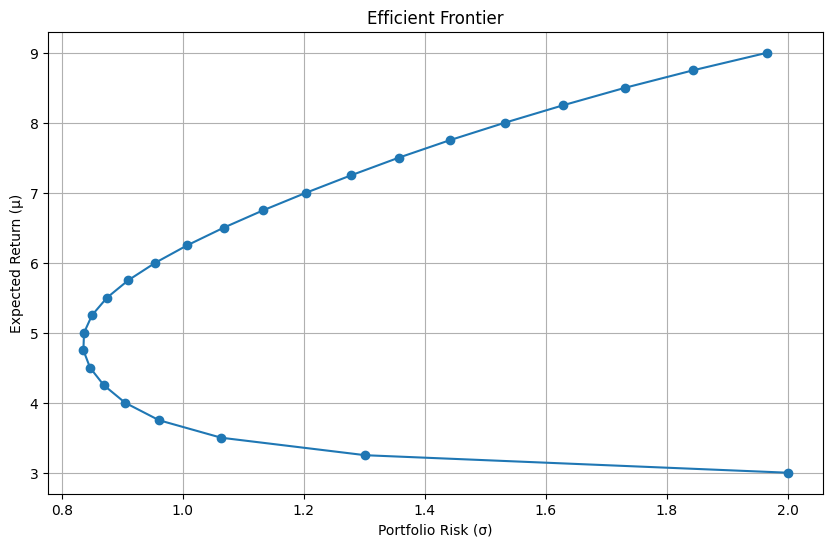

In [12]:
#plot the results now
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o')
plt.xlabel('Portfolio Risk (σ)')
plt.ylabel('Expected Return (μ)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()